# CHAPTER 2

In [41]:
library(tidyverse)
library(gridExtra)
library(readr)
library(forecast)
library(repr)

options(repr.plot.width=8, repr.plot.height=2.5)

SIM_2 <- read_delim("C:/Users/larsn/Desktop/Walter Enders R/Data/SIM_2.csv", ";", 
                    escape_double = FALSE, locale = locale(decimal_mark = ","), 
                    trim_ws = TRUE)

Parsed with column specification:
cols(
  OBS = col_integer(),
  Y1 = col_double(),
  Y2 = col_double(),
  Y3 = col_double()
)


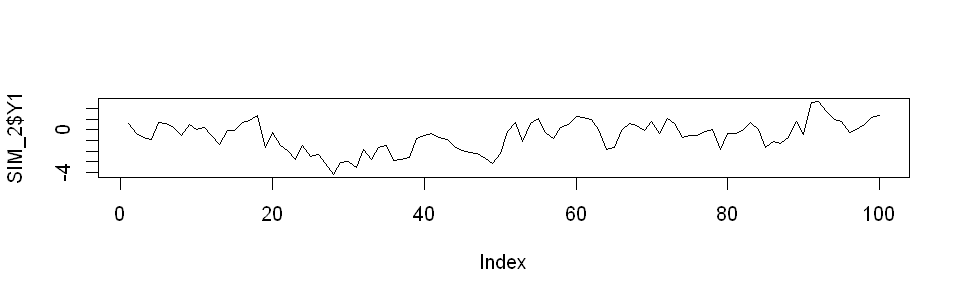

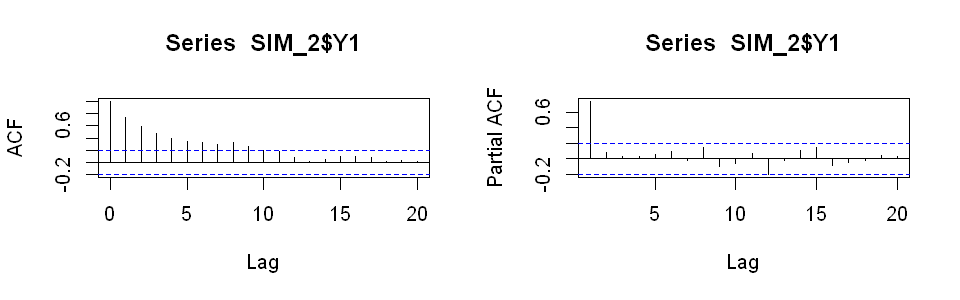

In [42]:
plot(SIM_2$Y1, type="l")
par(mfrow=c(1,2))
acf(SIM_2$Y1)
pacf(SIM_2$Y1)

In [43]:
m1 <- arima(SIM_2$Y1, order = c(1,0,0), include.mean=FALSE)
m1


Call:
arima(x = SIM_2$Y1, order = c(1, 0, 0), include.mean = FALSE)

Coefficients:
         ar1
      0.7840
s.e.  0.0606

sigma^2 estimated as 0.8525:  log likelihood = -134.39,  aic = 272.78

In [44]:
Box.test(m1$residuals,lag=8,type="Ljung-Box")
Box.test(m1$residuals,lag=16,type="Ljung-Box")
Box.test(m1$residuals,lag=24,type="Ljung-Box")


	Box-Ljung test

data:  m1$residuals
X-squared = 6.3024, df = 8, p-value = 0.6134



	Box-Ljung test

data:  m1$residuals
X-squared = 15.666, df = 16, p-value = 0.4765



	Box-Ljung test

data:  m1$residuals
X-squared = 21.528, df = 24, p-value = 0.6074


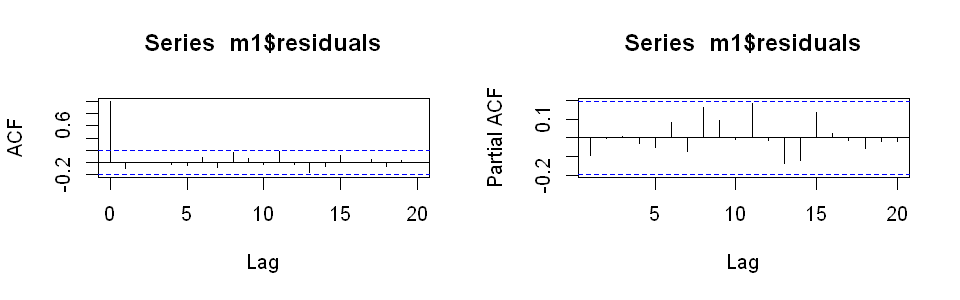

In [45]:
par(mfrow=c(1,2))
acf(m1$residuals)
pacf(m1$residuals)

In [46]:
m2 <- arima(SIM_2$Y1, order = c(1,0,12), fixed=c(NA,0,0,0,0,0,0,0,0,0,0,0,NA), include.mean=FALSE)
m2


Call:
arima(x = SIM_2$Y1, order = c(1, 0, 12), include.mean = FALSE, fixed = c(NA, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, NA))

Coefficients:
         ar1  ma1  ma2  ma3  ma4  ma5  ma6  ma7  ma8  ma9  ma10  ma11     ma12
      0.7874    0    0    0    0    0    0    0    0    0     0     0  -0.0260
s.e.  0.0626    0    0    0    0    0    0    0    0    0     0     0   0.1314

sigma^2 estimated as 0.852:  log likelihood = -134.37,  aic = 274.74

Manually calculate AIC

In [47]:
T <- 99
SSR <- sum(m1$residuals^2)
n <- 2

AIC <- T * log(SSR) + 2*n
AIC

[1] 444.1133

## Next series

In [48]:
m2_1 <- arima(SIM_2$Y2, order = c(1,0,0))
m2_2 <- arima(SIM_2$Y2, order = c(1,0,1))
m2_3 <- arima(SIM_2$Y2, order = c(2,0,0))

m2_1
m2_2
m2_3


Call:
arima(x = SIM_2$Y2, order = c(1, 0, 0))

Coefficients:
          ar1  intercept
      -0.8502     0.0006
s.e.   0.0524     0.0689

sigma^2 estimated as 1.61:  log likelihood = -166.35,  aic = 338.7


Call:
arima(x = SIM_2$Y2, order = c(1, 0, 1))

Coefficients:
          ar1      ma1  intercept
      -0.7077  -0.6701    -0.0085
s.e.   0.0785   0.0955     0.0219

sigma^2 estimated as 1.225:  log likelihood = -153.08,  aic = 314.16


Call:
arima(x = SIM_2$Y2, order = c(2, 0, 0))

Coefficients:
          ar1      ar2  intercept
      -1.1776  -0.3842    -0.0030
s.e.   0.0928   0.0929     0.0461

sigma^2 estimated as 1.372:  log likelihood = -158.5,  aic = 325.01

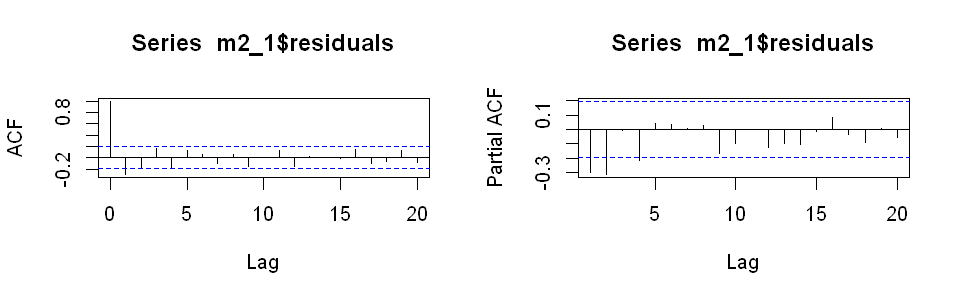

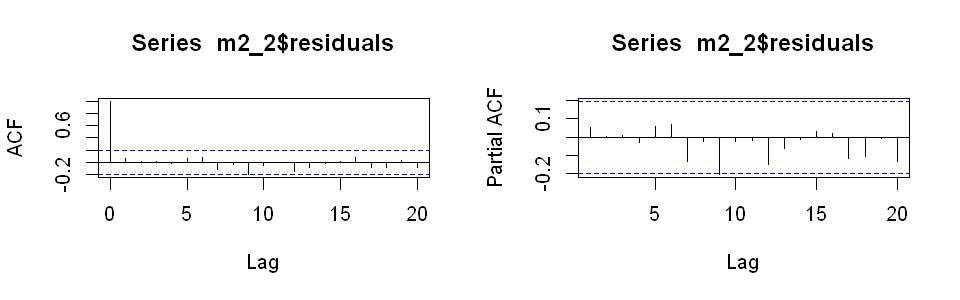

In [49]:
par(mfrow=c(1,2))
acf(m2_1$residuals)
pacf(m2_1$residuals)

par(mfrow=c(1,2))
acf(m2_2$residuals)
pacf(m2_2$residuals)

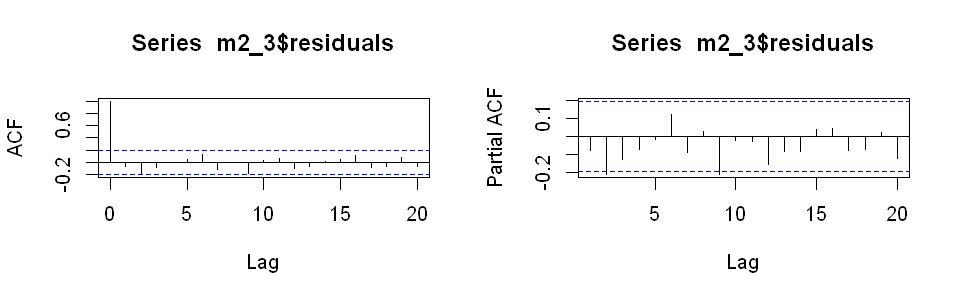

In [50]:
par(mfrow=c(1,2))
acf(m2_3$residuals)
pacf(m2_3$residuals)

## Next series

In [51]:
m3 <- arima(SIM_2$Y3, order = c(2,0,0))
m3


Call:
arima(x = SIM_2$Y3, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      0.6842  -0.4748    -0.0250
s.e.  0.0872   0.0865     0.0373

sigma^2 estimated as 0.08635:  log likelihood = -19.8,  aic = 47.6

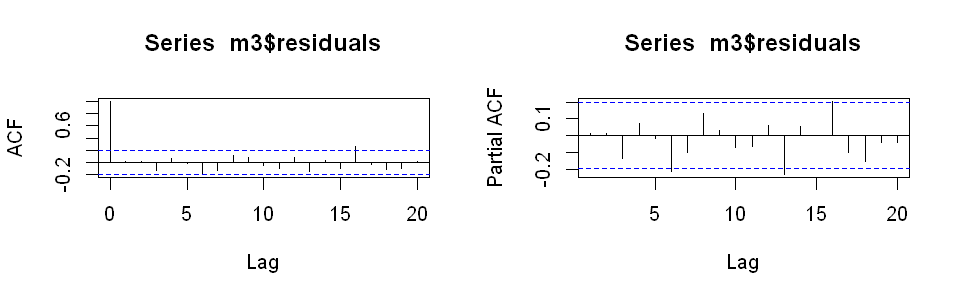

In [52]:
par(mfrow=c(1,2))
acf(m3$residuals)
pacf(m3$residuals)

In [59]:
Box.test(m3$residuals,lag=16,type="Ljung-Box")


	Box-Ljung test

data:  m3$residuals
X-squared = 9.4732, df = 8, p-value = 0.304



	Box-Ljung test

data:  m3$residuals
X-squared = 24.457, df = 16, p-value = 0.07998



	Box-Ljung test

data:  m3$residuals
X-squared = 31.915, df = 24, p-value = 0.1291


There was autocorrelation at lag 16 according to Ljung-Box so we split dataset to control if lag 16 really is somehting

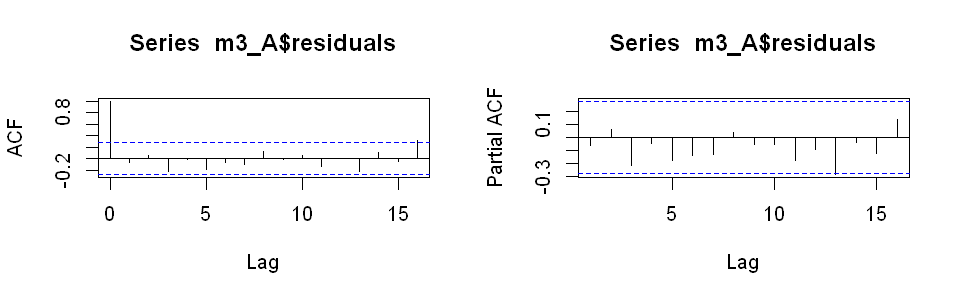

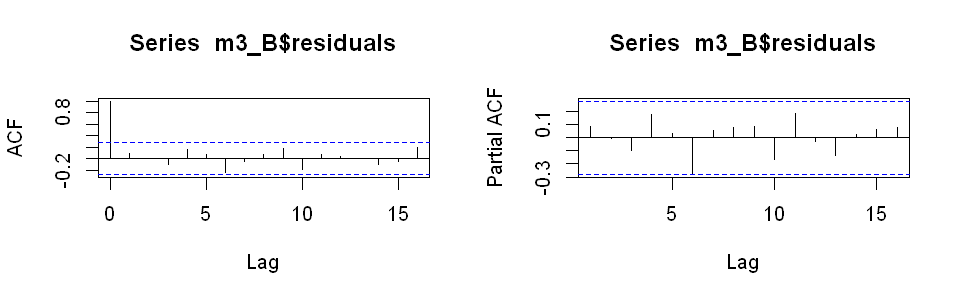


	Box-Ljung test

data:  m3_B$residuals
X-squared = 15.097, df = 16, p-value = 0.5176


ERROR: Error in replayPlot(obj): invalid graphics state


Plot with title "Series  SIM_2$Y1"

In [60]:
A <- SIM_2$Y3[1:50]
B <- SIM_2$Y3[51:100]

m3_A <- arima(A, order = c(2,0,0))
m3_B <- arima(B, order = c(2,0,0))


par(mfrow=c(1,2))
acf(m3_A$residuals)
pacf(m3_A$residuals)

par(mfrow=c(1,2))
acf(m3_B$residuals)
pacf(m3_B$residuals)

In [61]:
Box.test(m3_B$residuals,lag=16,type="Ljung-Box")


	Box-Ljung test

data:  m3_B$residuals
X-squared = 15.097, df = 16, p-value = 0.5176


Now the Ljung-Box test shows that we can clearly reject autocorrelation at lag 16